<a href="https://colab.research.google.com/github/manola1109/Deep-Learning-Projects/blob/main/Early_stopping_in_Neural_Networks_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps to solve Emergency vs Non-Emergency vehicle classification problem using Early Stopping

<ol>1. Loading the dataset</ol>
<ol>2. Pre-processing the data</ol>
<ol>3. Creating training and validation set</ol>
<ol>4. Defining the model architecture</ol>
<ol>5. Compiling the model</ol>
<ol>6. Setting up Early Stopping</ol>
<ol>7. Training the model using Early Stopping</ol>
<ol>8. Evaluating model performance</ol>

## 1. Loading the dataset

In [2]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module
from keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# unzipping the Dataset.zip file
!unzip /content/drive/My\ Drive/Dataset.zip

Archive:  /content/drive/My Drive/Dataset.zip
replace Dataset/emergency_classification.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [5]:
# reading the csv file
data = pd.read_csv('Dataset/emergency_classification.csv')

In [6]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [7]:
# looking at first five rows of the data
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [8]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)

# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

In [9]:
# shape of the images
X.shape

(2352, 224, 224, 3)

## 2. Pre-processing the data

In [10]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [11]:
# minimum and maximum pixel values of images
X.min(), X.max()

(np.uint8(0), np.uint8(255))

In [12]:
# normalizing the pixel values
X = X / X.max()

In [13]:
# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(np.float64(0.0), np.float64(1.0))

## 3. Creating training and validation set

In [14]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [15]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

## 4. Defining the model architecture

In [16]:
# defining the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


## 5. Compiling the model

In [17]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(learning_rate=1e-5)

In [18]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

## 6. Setting up Early Stopping

In [19]:
# importing module for early stopping
from keras.callbacks import EarlyStopping

In [20]:
# setting up early stopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5, mode='min')

## 7. Training the model using Early Stopping

In [21]:
# training the model for 100 epochs

# defining the early stopping as callback using callbacks parameter of model.fit
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid), callbacks=[early_stopping])

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 364ms/step - accuracy: 0.5923 - loss: 0.7053 - val_accuracy: 0.5609 - val_loss: 0.6825
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.5916 - loss: 0.6781 - val_accuracy: 0.5609 - val_loss: 0.6771
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.5847 - loss: 0.6698 - val_accuracy: 0.5609 - val_loss: 0.6720
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - accuracy: 0.5802 - loss: 0.6610 - val_accuracy: 0.5609 - val_loss: 0.6621
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.5736 - loss: 0.6585 - val_accuracy: 0.5609 - val_loss: 0.6593
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.5804 - loss: 0.6461 - val_accuracy: 0.5609 - val_loss: 0.6497
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.5844 - loss: 0.6349 - val_accuracy: 0.5609 - val_loss: 0.6467
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.5782 - loss: 0.6333 - val_accuracy

## 8. Evaluating model performance

In [22]:
# accuracy on validation set
y_pred_prob = model.predict(X_valid)
y_pred_class = (y_pred_prob > 0.5).astype(int) # Convert probabilities to class labels (0 or 1)

print('Accuracy on validation set:', accuracy_score(y_valid, y_pred_class[:, 0]), '%')

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
Accuracy on validation set: 0.6572237960339944 %


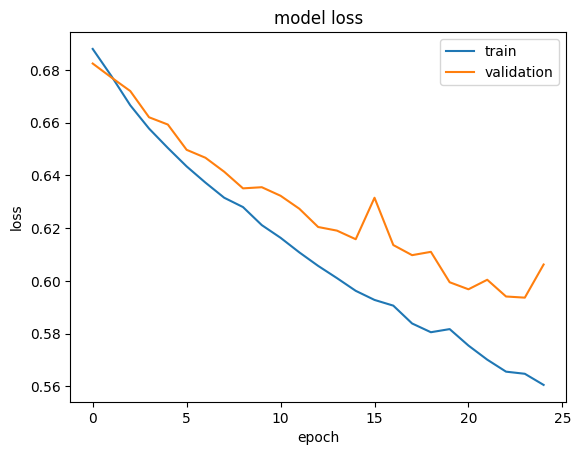

In [23]:
 # summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

![alt text](https://drive.google.com/uc?id=1Z-ceA9CQH5W4ecusIyzqLLJn2djR8vQb)

## Hyperparameter tuning for Early Stopping (Increasing the patience value)

In [24]:
# defining and compiling the model

# defining the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# defining a NEW adam optimizer instance for the new model
adam_new = Adam(learning_rate=1e-5)

# compiling the model
# Use the new optimizer instance 'adam_new' for the new model
model.compile(loss='binary_crossentropy', optimizer=adam_new, metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [25]:
# increasing the patience and threshold value
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, mode='min')

In [26]:
# training the model for 100 epochs
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid), callbacks=[early_stopping])


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 300ms/step - accuracy: 0.5996 - loss: 0.6793 - val_accuracy: 0.5623 - val_loss: 0.6644
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.5765 - loss: 0.6585 - val_accuracy: 0.5779 - val_loss: 0.6493
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.6086 - loss: 0.6469 - val_accuracy: 0.5722 - val_loss: 0.6489
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.6168 - loss: 0.6368 - val_accuracy: 0.6303 - val_loss: 0.6322
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.6327 - loss: 0.6279 - val_accuracy: 0.6388 - val_loss: 0.6279
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.6719 - loss: 0.6062 - val_accuracy: 0.6629 - val_loss: 0.6188
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.6575 - loss: 0.6044 - val_accuracy: 0.6742 - val_loss: 0.6143
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.6767 - loss: 0.6041 - val_accuracy: 

In [28]:
# accuracy on validation set
# Use model.predict() to get probabilities and then convert to class labels
y_pred_prob = model.predict(X_valid)
y_pred_class = (y_pred_prob > 0.5).astype(int) # Convert probabilities to class labels (0 or 1)

print('Accuracy on validation set:', accuracy_score(y_valid, y_pred_class[:, 0]), '%')

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step
Accuracy on validation set: 0.7195467422096318 %


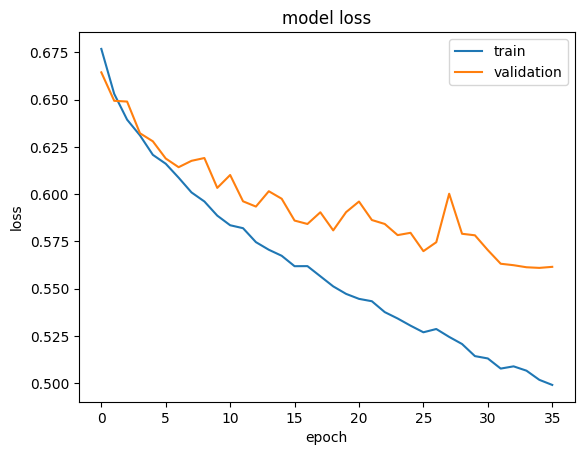

In [29]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()